In [2]:
#!/usr/bin/env python
'''
DESCRIPTION
-----------
    Encoding information
# 
RETURN
------
    {EXPERIMENT}_enc.png : png file
        graph


EXPORTED FILE(s) LOCATION
-------------------------
    ./reports/encoding/{EXPERIMENT}/{DESING}_enc.png
'''

# importing default libraries
SEED=91
# to get reproducible results
import os, argparse, sys
import tensorflow as tf
tf.random.set_seed(SEED)
import numpy as np
np.random.seed(SEED)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# importing scripts in scripts folder
from scripts import config as src

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from tensorflow import keras

FIGURE_TITLE_SIZE = 18
SUBPLOT_TITLE_SIZE = 14
LEGEND_TITLE_SIZE = 12
FONT_SIZE = 10

plt.rc('font', size=FONT_SIZE)                # controls default text sizes
plt.rc('axes', titlesize=SUBPLOT_TITLE_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=LEGEND_TITLE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FIGURE_TITLE_SIZE)  # fontsize of the figure title

## MELANOMA

In [16]:
# loc = './reports/encoding/exper_melanoma'
split = 'train_test_split'
experiment = 'exper_melanoma'
loc_read = glob.glob(os.path.join('./sep_14/models/', experiment, f'{split}*'))[0]

df_unseen = pd.read_pickle('./data/processed/exper_melanoma/query_log1p.pck')
# df = df[df['cell_type']!='Neg.cell'].reset_index(drop=True)
X_unseen = df_unseen.iloc[:, :-1].values
y_ground_truth_unseen = df_unseen.iloc[:, -1:]


df_seen = pd.read_pickle('./data/processed/exper_melanoma/reference_log1p.pck')
# df = df[df['cell_type']!='Neg.cell'].reset_index(drop=True)
X_seen = df_seen.iloc[:, :-1].values
y_ground_truth_seen = df_seen.iloc[:, -1:]


print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X_unseen.shape, y_ground_truth_unseen.shape))
print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X_seen.shape, y_ground_truth_seen.shape))

shape of feature and traget dataset, feature dataset, (3412, 17994), target column (3412, 1)
shape of feature and traget dataset, feature dataset, (2761, 17994), target column (2761, 1)


In [17]:
order_plot = list(np.unique(y_ground_truth_seen))
seen_label = dict(zip(order_plot, range(len(order_plot))))
order_plot.append('Neg.cell')
unseen_label = dict(zip(order_plot, range(len(order_plot))))
print(seen_label)
print(unseen_label)
# seen_label.keys()

{'B.cell': 0, 'Macrophage': 1, 'NK': 2, 'T.CD4': 3, 'T.CD8': 4}
{'B.cell': 0, 'Macrophage': 1, 'NK': 2, 'T.CD4': 3, 'T.CD8': 4, 'Neg.cell': 5}


In [11]:
# loc_read = glob.glob(os.path.join('./sep_14/models_org/', experiment, f'{split}*'))[0]
# print(glob.glob(os.path.join(loc_read, f'encoding_1_layer*'))[0])
# print(glob.glob(os.path.join(loc_read, f'encoding_2_layer*'))[0])
# model_1 = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_1_layer*'))[0] , compile=False)
# model_2 = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_2_layer*'))[0] , compile=False)

./sep_14/models_org/exper_melanoma/train_test_split/encoding_1_layer_signaling_reference_log1p_Adam_relu.h5
./sep_14/models_org/exper_melanoma/train_test_split/encoding_2_layer_signaling_reference_log1p_Adam_relu.h5


In [18]:
print(glob.glob(os.path.join(loc_read, f'encoding_pathways_*1_layer*'))[0])
print(glob.glob(os.path.join(loc_read, f'encoding_pathways_*2_layer*'))[0])
model_1 = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_pathways*1_layer*'))[0] , compile=False)
model_2 = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_pathways*2_layer*'))[0] , compile=False)

./sep_14/models/exper_melanoma/train_test_split_tuningFalse_filtergeneFalse/encoding_pathways_signaling_1_layer_reference_log1p_Adam_relu.h5
./sep_14/models/exper_melanoma/train_test_split_tuningFalse_filtergeneFalse/encoding_pathways_signaling_2_layer_reference_log1p_Adam_relu.h5


In [26]:
df_encoding_seen_1 = pd.DataFrame(model_1.predict(X_seen))
df_encoding_seen_1['cell_type'] = y_ground_truth_seen
df_encoding_seen_1['dataset'] = 'training'
# df_encoding_unseen_1['design'] = '1-layer'

encoding_seen_all_1 = np.array(df_encoding_seen_1.iloc[:, :-2])
tsne_seen = TSNE().fit_transform(encoding_seen_all_1)

df_encoding_seen_1 = pd.concat([pd.DataFrame(tsne_seen, columns=['tsne1', 'tsne2']), df_encoding_seen_1.iloc[:, -2:]], axis=1)
df_encoding_seen_1

,tsne1,tsne2,cell_type,dataset
0,-27.399275,4.178828,B.cell,training
1,-32.886841,34.228706,B.cell,training
2,-36.122387,42.460667,B.cell,training
3,-26.049297,3.420290,B.cell,training
4,-31.355206,20.146799,B.cell,training
...,...,...,...,...
2756,-2.936219,-28.855745,T.CD8,training
2757,42.622215,-3.010733,T.CD8,training
2758,37.768986,-4.258120,T.CD8,training
2759,-9.793988,-38.806904,T.CD8,training


In [27]:
df_encoding_seen_2 = pd.DataFrame(model_2.predict(X_seen))
df_encoding_seen_2['cell_type'] = y_ground_truth_seen
df_encoding_seen_2['dataset'] = 'training'
# df_encoding_unseen_1['design'] = '1-layer'

encoding_seen_all_2 = np.array(df_encoding_seen_2.iloc[:, :-2])
tsne_seen = TSNE().fit_transform(encoding_seen_all_2)

df_encoding_seen_2 = pd.concat([pd.DataFrame(tsne_seen, columns=['tsne1', 'tsne2']), df_encoding_seen_2.iloc[:, -2:]], axis=1)
df_encoding_seen_2

,tsne1,tsne2,cell_type,dataset
0,2.985975,25.136694,B.cell,training
1,32.057041,46.117229,B.cell,training
2,46.319256,44.488163,B.cell,training
3,0.838337,25.142672,B.cell,training
4,14.511238,41.266266,B.cell,training
...,...,...,...,...
2756,25.998743,-14.384047,T.CD8,training
2757,-28.991379,-40.529587,T.CD8,training
2758,-23.742132,-39.751865,T.CD8,training
2759,26.558327,-21.890600,T.CD8,training


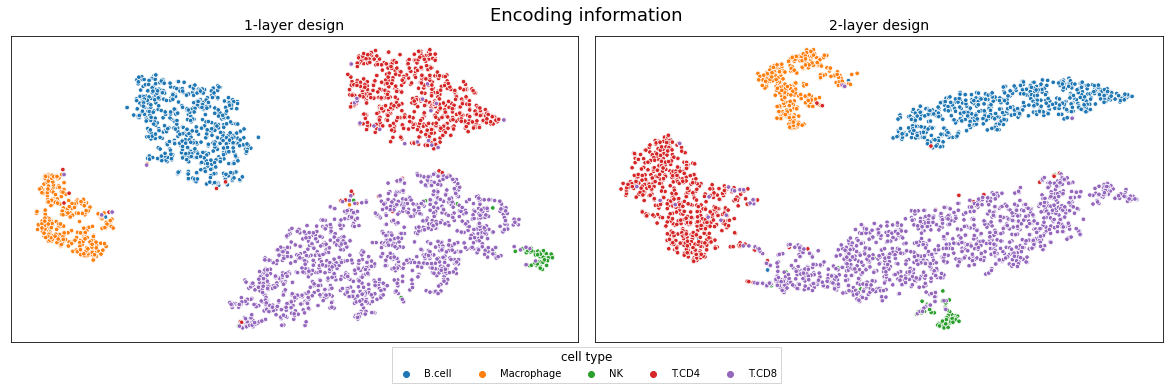

In [29]:
fig, axes= plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(data=df_encoding_seen_1, x='tsne1', y='tsne2', hue='cell_type', ax=axes[0], marker='.', s=80)
sns.scatterplot(data=df_encoding_seen_2, x='tsne1', y='tsne2', hue='cell_type', ax=axes[1], marker='.', s=80)

axes[0].get_legend().remove()
axes[0].set_title(f'1-layer design')


axes[1].get_legend().remove()
axes[1].set_title(f'2-layer design')

axes[0].axes.get_yaxis().set_visible(False)
axes[0].axes.get_xaxis().set_visible(False)

axes[1].axes.get_yaxis().set_visible(False)
axes[1].axes.get_xaxis().set_visible(False)

handles, labels = axes[1].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05)
                 , fancybox=False, shadow=False, ncol=6)
fig.suptitle(f'Encoding information')
plt.subplots_adjust(left=0.1,
                        bottom=0.05, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.03, 
                        hspace=.4);

plt.savefig(f'./paper1_encoding_vis_2.png', dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(f'./paper1_encoding_vis_2.tiff', dpi=300, bbox_inches = 'tight', pad_inches=0.1)

In [19]:
df_encoding_unseen_1 = pd.DataFrame(model_1.predict(X_unseen))
df_encoding_unseen_1['cell_type'] = y_ground_truth_unseen
df_encoding_unseen_1['dataset'] = 'testing'
# df_encoding_unseen_1['design'] = '1-layer'

encoding_all_1 = np.array(df_encoding_unseen_1.iloc[:, :-2])
tsne = TSNE().fit_transform(encoding_all_1)

df_encoding_1 = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), df_encoding_unseen_1.iloc[:, -2:]], axis=1)
df_encoding_1

,tsne1,tsne2,cell_type,dataset
0,41.937180,30.842703,Neg.cell,testing
1,-30.472120,5.681903,Neg.cell,testing
2,-1.692442,-0.287238,Neg.cell,testing
3,40.695385,16.004192,Neg.cell,testing
4,25.750784,43.997658,Neg.cell,testing
...,...,...,...,...
3407,-43.479092,-56.662655,T.CD8,testing
3408,-35.998634,-52.130371,T.CD8,testing
3409,-22.998690,-33.952995,T.CD8,testing
3410,-34.603420,-56.265972,T.CD8,testing


In [20]:
df_encoding_unseen_2 = pd.DataFrame(model_2.predict(X_unseen))
df_encoding_unseen_2['cell_type'] = y_ground_truth_unseen
df_encoding_unseen_2['dataset'] = 'testing'
# df_encoding_unseen_2['design'] = '2-layer'

encoding_all_2 = np.array(df_encoding_unseen_2.iloc[:, :-2])
tsne = TSNE().fit_transform(encoding_all_2)

df_encoding_2 = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), df_encoding_unseen_2.iloc[:, -2:]], axis=1)
df_encoding_2

,tsne1,tsne2,cell_type,dataset
0,52.247192,11.586949,Neg.cell,testing
1,-17.124714,-20.747782,Neg.cell,testing
2,8.928916,-16.465355,Neg.cell,testing
3,23.343632,28.553921,Neg.cell,testing
4,40.977592,32.060280,Neg.cell,testing
...,...,...,...,...
3407,-41.164127,36.691486,T.CD8,testing
3408,-50.282070,22.440838,T.CD8,testing
3409,-55.075184,20.782429,T.CD8,testing
3410,-41.653103,25.093201,T.CD8,testing


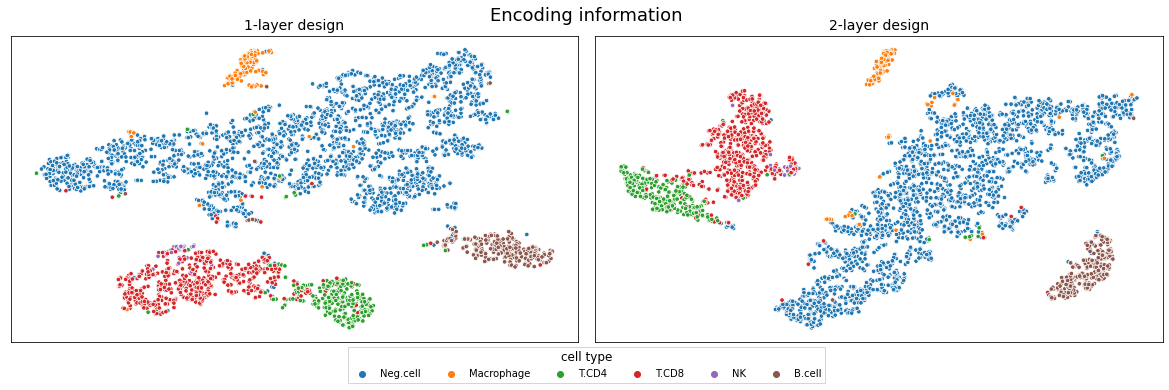

In [21]:
fig, axes= plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(data=df_encoding_1, x='tsne1', y='tsne2', hue='cell_type', ax=axes[0], marker='.', s=80)
sns.scatterplot(data=df_encoding_2, x='tsne1', y='tsne2', hue='cell_type', ax=axes[1], marker='.', s=80)

axes[0].get_legend().remove()
axes[0].set_title(f'1-layer design')


axes[1].get_legend().remove()
axes[1].set_title(f'2-layer design')

axes[0].axes.get_yaxis().set_visible(False)
axes[0].axes.get_xaxis().set_visible(False)

axes[1].axes.get_yaxis().set_visible(False)
axes[1].axes.get_xaxis().set_visible(False)

handles, labels = axes[1].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05)
                 , fancybox=False, shadow=False, ncol=6)
fig.suptitle(f'Encoding information')
plt.subplots_adjust(left=0.1,
                        bottom=0.05, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.03, 
                        hspace=.4);

# plt.savefig(f'./paper1_encoding_vis_2.png', dpi=300, bbox_inches = 'tight', pad_inches=0.1)
# plt.savefig(f'./paper1_encoding_vis_2.tiff', dpi=300, bbox_inches = 'tight', pad_inches=0.1)

In [6]:
# df_encoding_seen = pd.DataFrame(model.predict(X_seen))
# df_encoding_seen['cell_type'] = y_ground_truth_seen
# df_encoding_seen['dataset'] = 'training'
# df_encoding_unseen = pd.DataFrame(model.predict(X_unseen))
# df_encoding_unseen['cell_type'] = y_ground_truth_unseen
# df_encoding_unseen['dataset'] = 'testing'

df_encoding = pd.concat([df_encoding_seen, df_encoding_unseen]).reset_index(drop=True)

encoding_all = np.array(df_encoding.iloc[:, :-2])
tsne = TSNE().fit_transform(encoding_all)

df_encoding = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), df_encoding.iloc[:, -2:]], axis=1)
df_encoding

,tsne1,tsne2,cell_type,dataset
0,-20.648951,-46.114113,B.cell,training
1,-3.472789,-73.803719,B.cell,training
2,0.611341,-83.550331,B.cell,training
3,-22.157711,-46.127113,B.cell,training
4,-6.275756,-60.974007,B.cell,training
...,...,...,...,...
6168,-13.647277,68.083435,T.CD8,testing
6169,-32.835835,53.935738,T.CD8,testing
6170,-10.980044,6.494927,T.CD8,testing
6171,-25.181725,63.179657,T.CD8,testing


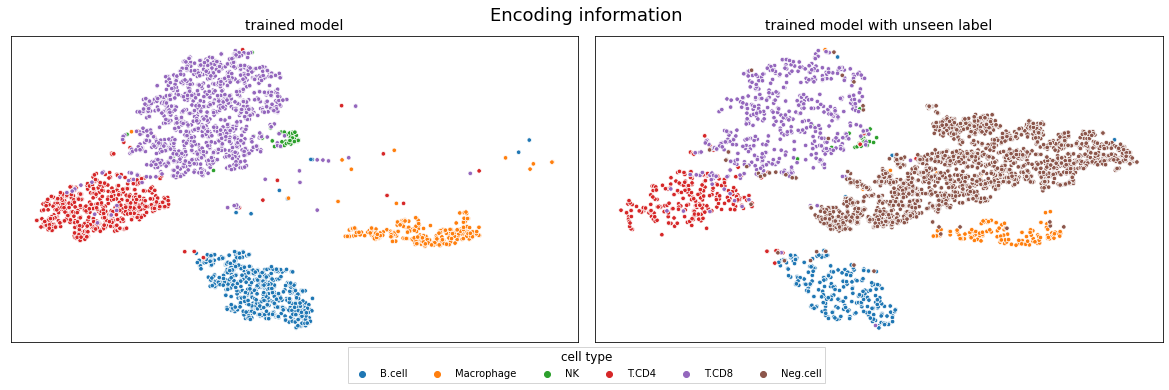

In [7]:
np.random.seed(SEED)
fig, axes= plt.subplots(ncols=2, figsize=(20,5))

df_encoding_tsne_seen = df_encoding[df_encoding['dataset']=='training'].iloc[:, :-1]
df_encoding_tsne_seen = df_encoding_tsne_seen.sort_values(by=['cell_type'], key=lambda x: x.map(seen_label))
df_encoding_tsne_unseen = df_encoding[df_encoding['dataset']=='testing'].iloc[:, :-1]
df_encoding_tsne_unseen = df_encoding_tsne_unseen.sort_values(by=['cell_type'], key=lambda x: x.map(seen_label))

sns.scatterplot(data=df_encoding_tsne_seen, x='tsne1', y='tsne2', hue='cell_type', ax=axes[0], marker='.', s=80)
sns.scatterplot(data=df_encoding_tsne_unseen, x='tsne1', y='tsne2', hue='cell_type', ax=axes[1], marker='.', s=80)

axes[0].get_legend().remove()
axes[0].set_title(f'trained model')


axes[1].get_legend().remove()
axes[1].set_title(f'trained model with unseen label')

axes[0].axes.get_yaxis().set_visible(False)
axes[0].axes.get_xaxis().set_visible(False)

axes[1].axes.get_yaxis().set_visible(False)
axes[1].axes.get_xaxis().set_visible(False)

handles, labels = axes[1].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05)
                 , fancybox=False, shadow=False, ncol=6)
fig.suptitle(f'Encoding information')
plt.subplots_adjust(left=0.1,
                        bottom=0.05, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.03, 
                        hspace=.4);

# plt.savefig(f'./reports/encoding/{experiment}/ECCB_encoding.png', dpi=300, bbox_inches = 'tight')
# plt.savefig(f'./reports/encoding/{experiment}/ECCB_encoding.pdf', dpi=300, bbox_inches = 'tight')
# plt.savefig(f'./reports/encoding/{experiment}/ECCB_encoding.svg', dpi=300, bbox_inches = 'tight')

# plt.savefig(f'./reports/encoding/{experiment}/mel_enc.png', dpi=300, bbox_inches = 'tight')
# plt.savefig(f'./reports/encoding/{experiment}/mel_enc.pdf', dpi=300, bbox_inches = 'tight')
# plt.savefig(f'./reports/encoding/{experiment}/mel_enc.svg', dpi=300, bbox_inches = 'tight')